# User activity by type


In [14]:
from pathlib import Path
from datetime import date
import jsonlines
import matplotlib_inline
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_context('paper')
import pandas as pd

In [4]:
stories = dict()
tbl_activity = []
for p in sorted(Path("../data").glob("*.jsonl")):
    with jsonlines.open(p) as reader:
        for row in reader:
            dt = date.fromtimestamp(row["timestamp"])
            year = dt.year
            month = dt.month
            ym = dt.strftime('%Y-%m')
            if p.name.startswith('messages'):
                title = row["title"]
                if title in stories:
                    action = 'amplify'
                else:
                    stories[title] = 1
                    action = 'submit'
            else:
                action = 'comment'                
            tbl_activity.append([ym, action])
df_activity = pd.DataFrame.from_records(tbl_activity, columns=['ym','action'])
df_activity.head()


,ym,action
0,2024-01,comment
1,2024-01,comment
2,2024-01,comment
3,2024-01,comment
4,2024-01,comment


In [35]:
dfc = df_activity.value_counts(['ym', 'action'])
dfc2 = dfc.reset_index().sort_values(by=['ym','action'], ascending=False)
dfc2.head()


,ym,action,count
23,2024-02,submit,6
22,2024-02,comment,8
20,2024-02,amplify,53
1,2024-01,submit,764
19,2024-01,comment,129


In [54]:
dfc3 = dfc2.pivot(index='ym', columns=['action'])

<Axes: xlabel='ym'>

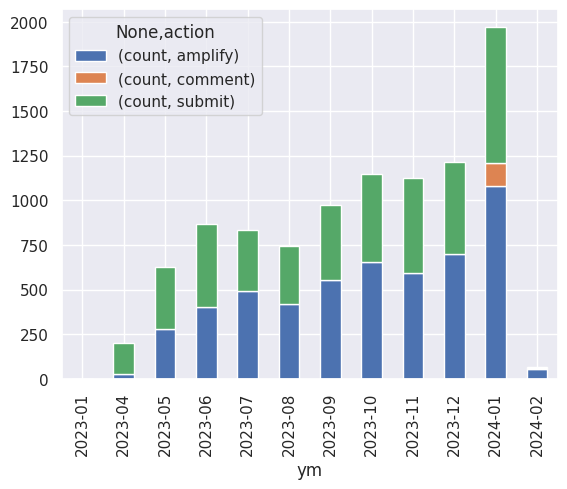

In [57]:
dfc3.plot(kind='bar', stacked=True)